## Problem Statement

About Dataset
Context This dataset is created for prediction of Graduate Admissions from an Indian perspective.

Content The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

In [1]:
#importing libraries
#pandas library for data manupulation
import pandas as pd
#numpy library for mathematical operations
import numpy as np
#Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#filter warnings to ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")

## Creating DataFrame

In [2]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\Admission_Predict.csv")

In [3]:
data.drop("Serial No.",axis=1,inplace=True)

In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


## Exploring the Dataset

In [6]:
data.shape

(400, 8)

In [7]:
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [9]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Cleaning Dataset

In [11]:
data.duplicated().sum()

0

In [12]:
data.Research.unique()

array([1, 0], dtype=int64)

In [13]:
data.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

In [14]:
data["University Rating"].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [15]:
data["University Rating"].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

## Data Visulization

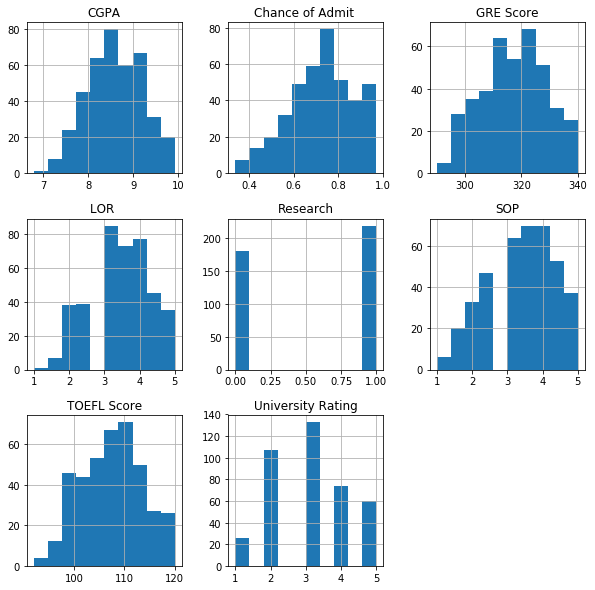

In [16]:
data.hist(figsize=(10,10))
plt.show()

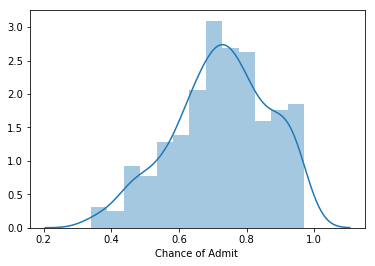

In [17]:
sns.distplot(data["Chance of Admit "])
plt.show()

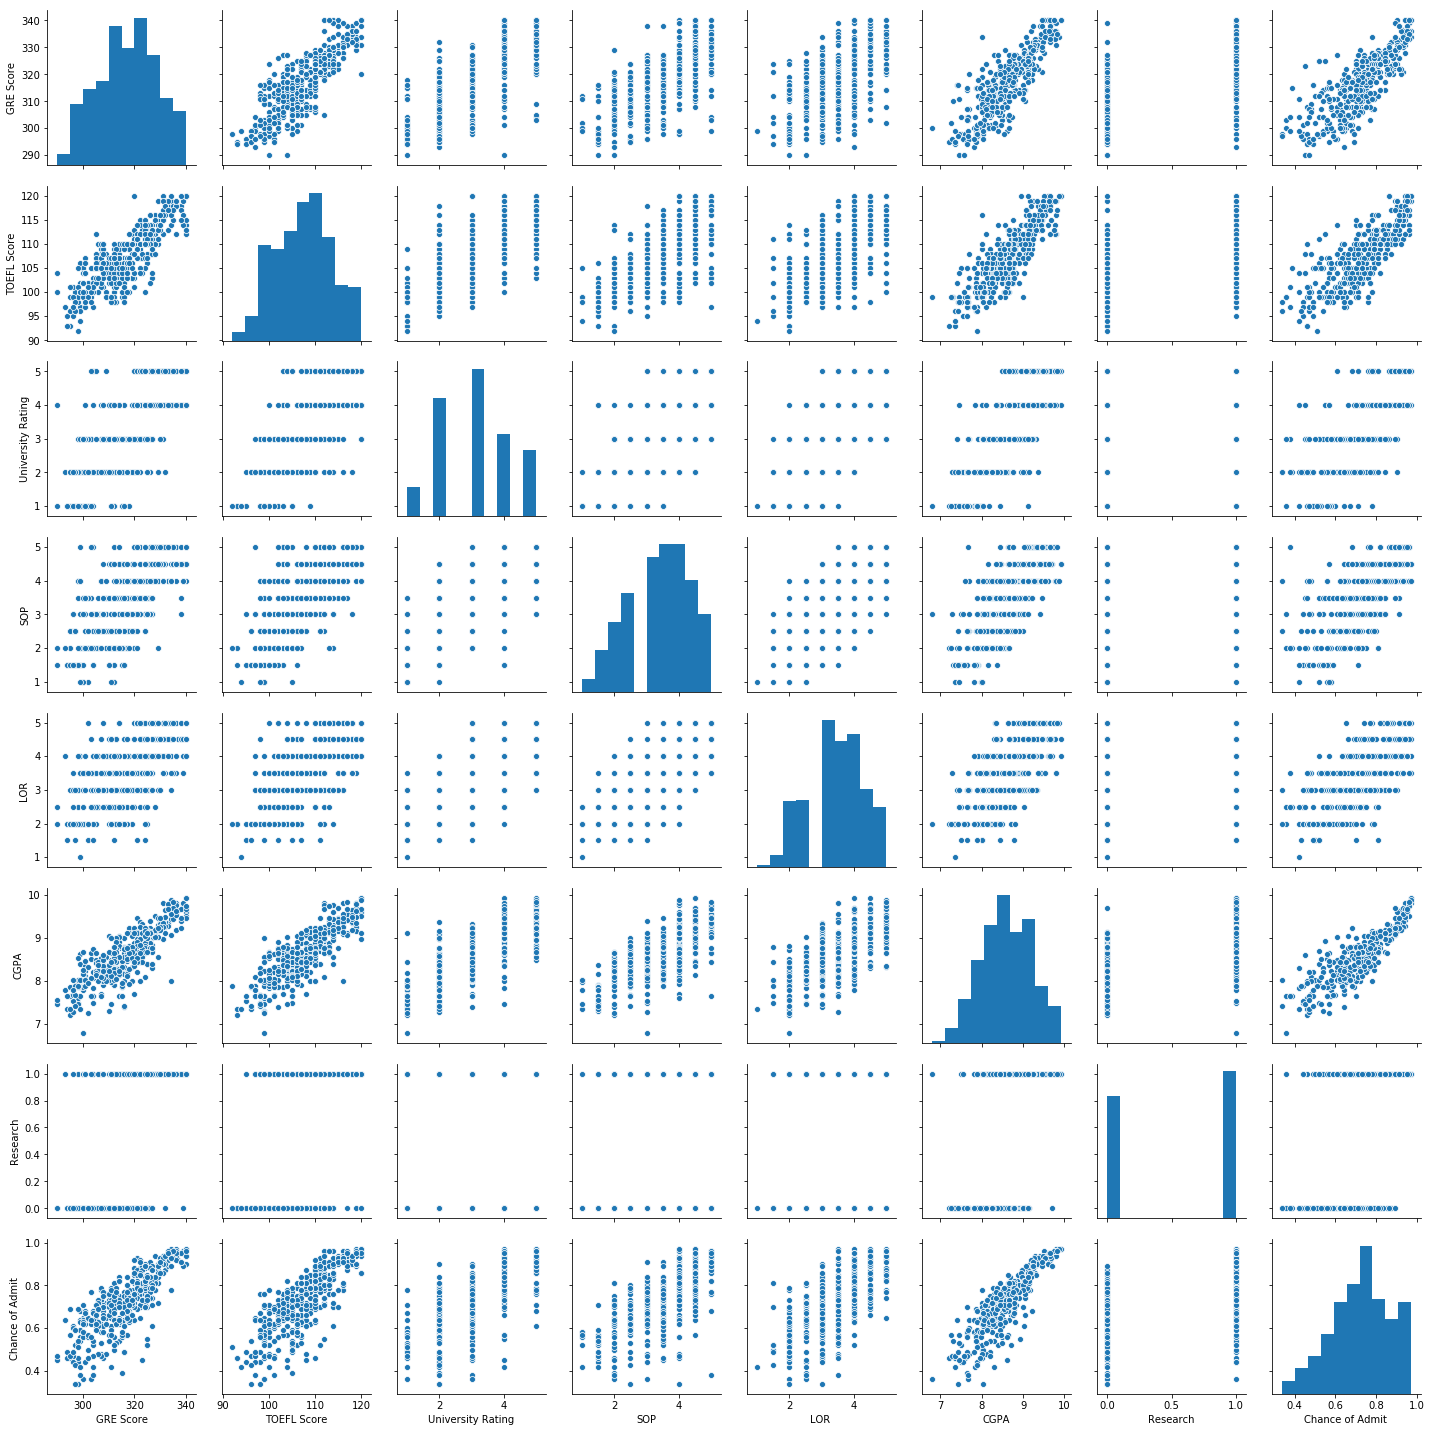

In [18]:
sns.pairplot(data)
plt.show()

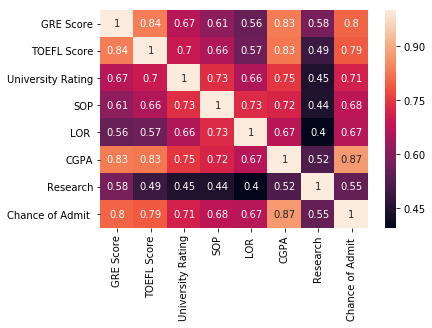

In [19]:
sns.heatmap(data.corr(),annot=True)
plt.show()

from the above heat map ve could observe that every independent variable are positively corelated to the dependent variable(Target variable)

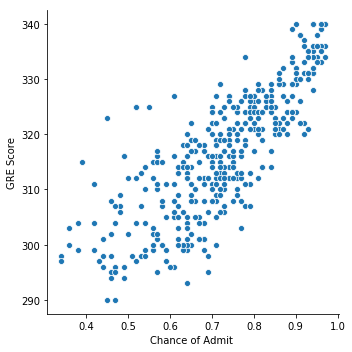

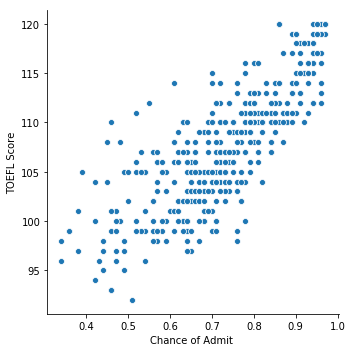

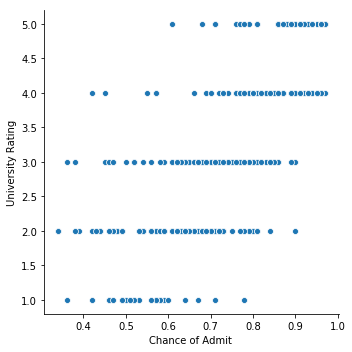

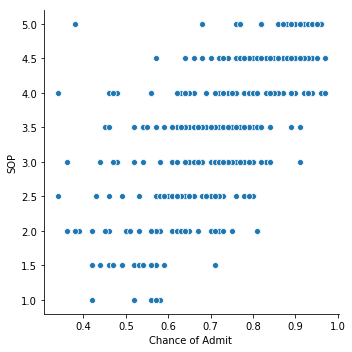

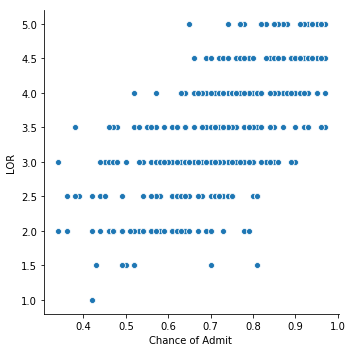

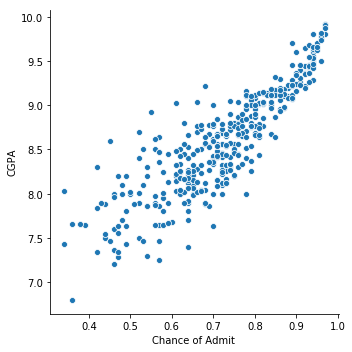

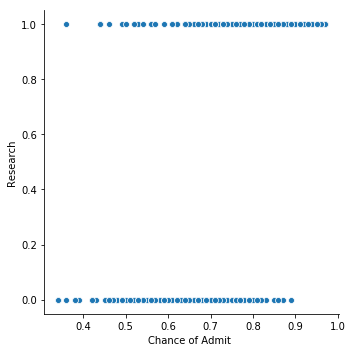

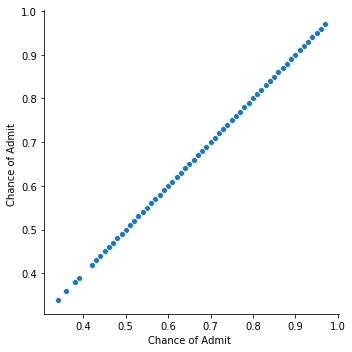

In [20]:
for i in data.columns:
    sns.relplot(x="Chance of Admit ",y=i,data=data)
plt.show()

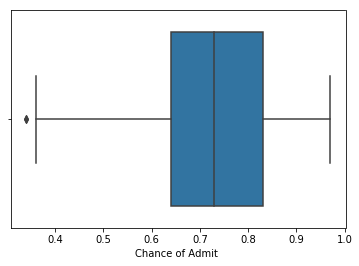

In [21]:
sns.boxplot(data["Chance of Admit "])

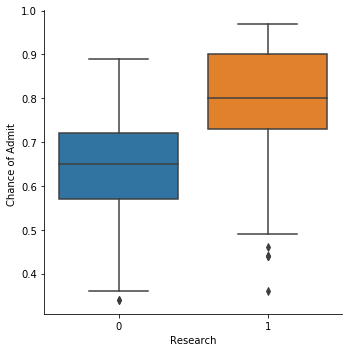

In [22]:
sns.catplot(x="Research",y="Chance of Admit ",data=data,kind="box")

In [23]:
data.groupby(["Research"])["Chance of Admit "].describe()

,count,mean,std,min,25%,50%,75%,max
Research,,,,,,,,
0,181.0,0.637680,0.113784,0.34,0.57,0.65,0.72,0.89
1,219.0,0.795982,0.123051,0.36,0.73,0.80,0.90,0.97


The average percentage of people getting admited in a college by performing research(80%) is greater than people who do not(i.e 65%) 

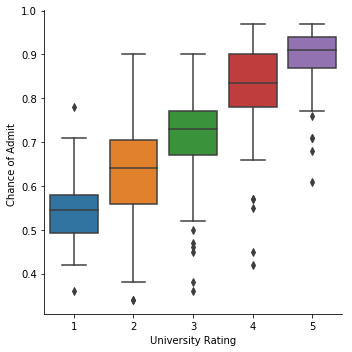

In [24]:
sns.catplot(x="University Rating",y="Chance of Admit ",data=data,kind="box")
plt.show()

In [25]:
data.groupby(["University Rating"])["Chance of Admit "].describe()

,count,mean,std,min,25%,50%,75%,max
University Rating,,,,,,,,
1,26.0,0.548077,0.089220,0.36,0.4925,0.545,0.580,0.78
2,107.0,0.625981,0.111692,0.34,0.5600,0.640,0.705,0.90
3,133.0,0.711880,0.095831,0.36,0.6700,0.730,0.770,0.90
4,74.0,0.818108,0.111977,0.42,0.7800,0.835,0.900,0.97
5,60.0,0.888167,0.076035,0.61,0.8700,0.910,0.940,0.97


In [26]:
df=data.copy()

In [27]:
dr1=df[df["University Rating"]==3][df["Chance of Admit "]<.4].index
dr1

Int64Index([91, 94], dtype='int64')

The percent of people getting placed is directly proportional to there previous university. if the university is higly ranked there is a high posibility of getting admited. 

## Splitting of train and test data

In [28]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

In [29]:
scalar=x_train=scaler.fit_transform(data[["GRE Score","TOEFL Score"]])
scalar

array([[ 1.76210664,  1.74697064],
       [ 0.62765641, -0.06763531],
       [-0.07046681, -0.56252785],
       [ 0.4531256 ,  0.42725722],
       [-0.24499762, -0.72749202],
       [ 1.15124883,  1.25207811],
       [ 0.3658602 ,  0.26229304],
       [-0.76859003, -1.05742038],
       [-1.29218245, -0.8924562 ],
       [ 0.54039101,  0.09732886],
       [ 0.71492181, -0.23259949],
       [ 0.88945262,  0.5922214 ],
       [ 0.97671802,  0.75718558],
       [-0.85585544,  0.26229304],
       [-0.50679383, -0.56252785],
       [-0.24499762, -0.39756367],
       [ 0.01679859, -0.06763531],
       [ 0.1913294 , -0.23259949],
       [ 0.10406399,  0.42725722],
       [-1.20491705, -0.8924562 ],
       [-0.41952842, -0.06763531],
       [ 0.71492181,  1.08711393],
       [ 0.97671802,  1.41704229],
       [ 1.50031044,  1.91193482],
       [ 1.67484124,  1.91193482],
       [ 2.02390285,  2.076899  ],
       [ 0.4531256 ,  0.26229304],
       [-1.64124406, -1.55231291],
       [-1.90304027,

In [30]:
df=data.copy()

In [31]:
df[["GRE Score","TOEFL Score"]]=scalar
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.762107,1.746971,4,4.5,4.5,9.65,1,0.92
1,0.627656,-0.067635,4,4.0,4.5,8.87,1,0.76
2,-0.070467,-0.562528,3,3.0,3.5,8.00,1,0.72
3,0.453126,0.427257,3,3.5,2.5,8.67,1,0.80
4,-0.244998,-0.727492,2,2.0,3.0,8.21,0,0.65
5,1.151249,1.252078,5,4.5,3.0,9.34,1,0.90
6,0.365860,0.262293,3,3.0,4.0,8.20,1,0.75
7,-0.768590,-1.057420,2,3.0,4.0,7.90,0,0.68
8,-1.292182,-0.892456,1,2.0,1.5,8.00,0,0.50
9,0.540391,0.097329,3,3.5,3.0,8.60,0,0.45


In [32]:
y=df["Chance of Admit "]

In [33]:
x=df.drop("Chance of Admit ",axis=1)

In [34]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,4,4.5,4.5,9.65,1
1,0.627656,-0.067635,4,4.0,4.5,8.87,1
2,-0.070467,-0.562528,3,3.0,3.5,8.00,1
3,0.453126,0.427257,3,3.5,2.5,8.67,1
4,-0.244998,-0.727492,2,2.0,3.0,8.21,0


In [35]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [36]:
x.shape,y.shape

((400, 7), (400,))

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 7), (80, 7), (320,), (80,))

## Build the Regression Algorithm

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
y_train_pre=lr.predict(X_train)

In [40]:
y_predection=lr.predict(X_test)

In [41]:
y_predection

array([0.68493439, 0.70964744, 0.61967646, 0.79718111, 0.72579391,
       0.58465786, 0.51272103, 0.71867805, 0.5506205 , 0.76758359,
       0.61439377, 0.94120408, 0.95852441, 0.855671  , 0.66495508,
       0.86509932, 0.83669704, 0.57122153, 0.58688782, 0.79673871,
       0.84705035, 0.82279771, 0.63512218, 0.78524173, 0.68163919,
       0.67978756, 0.67272376, 0.74138875, 0.89467911, 0.64423643,
       0.85721489, 0.95836796, 0.79024888, 0.64071971, 0.52492349,
       0.95026087, 0.78898187, 0.61386837, 0.88923031, 0.64010155,
       0.69625947, 0.92432719, 0.85106242, 0.8802917 , 0.96334898,
       0.70514809, 0.82301737, 0.67780639, 0.85560043, 0.75980776,
       0.56610256, 0.85181148, 0.77005501, 0.75466729, 0.65174579,
       0.58839706, 0.69661713, 0.92867338, 0.63972309, 0.84260214,
       0.96441315, 0.91176992, 0.59152202, 0.97029119, 0.95878191,
       0.51234103, 0.83001464, 0.78155371, 0.47055933, 0.59134223,
       0.67310332, 0.71941526, 0.65220101, 0.70524693, 0.84050

In [42]:
y_test.head()

184    0.72
6      0.75
61     0.47
312    0.78
100    0.71
Name: Chance of Admit , dtype: float64

## Evaluation Metrics

In [43]:
train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.8029928607242408


In [44]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predection)
print('R2 Score =',score)

R2 Score = 0.8008217476704984


In [53]:
score_train=r2_score(y_train,y_train_pre)
print("R2 score of train=",score_train)

R2 score of train= 0.8029928607242408


In [54]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_predection))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_predection))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_predection)))

Mean Absolute Error = 0.04559067674866974
Mean Squared Error = 0.004522214620573435
Root Mean Squared Error = 0.06724741348612179


In [55]:
# To find the intercept 
print('Intercept =',lr.intercept_)

Intercept = -0.42232270468460986


In [56]:
# To find the co-efficients
print('coefficients =',lr.coef_)

coefficients = [ 0.01851124  0.01958224  0.00323172 -0.00149642  0.02073565  0.12349175
  0.01928049]


In [57]:
pd.DataFrame({'Actual':y_test,'Predicted':y_predection,'Variance':y_test-y_predection}).head()

,Actual,Predicted,Variance
184,0.72,0.684934,0.035066
6,0.75,0.709647,0.040353
61,0.47,0.619676,-0.149676
312,0.78,0.797181,-0.017181
100,0.71,0.725794,-0.015794


In [58]:
np.mean(y_test-y_predection)#average varience between predicted and actual values

-0.011297948685026557

In [59]:
a=scaler.transform([[350,115]])
a

array([[2.89655688, 1.25207811]])

In [51]:
lr.predict([[2.89655688, 1.25207811,4,4.0,4.2,9,1]])

array([0.8805518])

## We can conclude saying that if a person has scored [350,115,4,4.0,4.2,9,1] for 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', respectively, the chances of getting admited lies between 0.81 to 0.94

In [60]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [62]:
0.8805518+0.06724741348612179

0.9477992134861217